In [70]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')



from scipy import stats
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

plt.rcParams['figure.figsize'] = (8,4)

[nltk_data] Downloading package punkt to /home/ken/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ken/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df = pd.read_csv('train.csv')
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                54000 non-null  object 
 1   DateTimeOfAccident         54000 non-null  object 
 2   DateReported               54000 non-null  object 
 3   Age                        54000 non-null  int64  
 4   Gender                     54000 non-null  object 
 5   MaritalStatus              53971 non-null  object 
 6   DependentChildren          54000 non-null  int64  
 7   DependentsOther            54000 non-null  int64  
 8   WeeklyWages                54000 non-null  float64
 9   PartTimeFullTime           54000 non-null  object 
 10  HoursWorkedPerWeek         54000 non-null  float64
 11  DaysWorkedPerWeek          54000 non-null  int64  
 12  ClaimDescription           54000 non-null  object 
 13  InitialIncurredCalimsCost  54000 non-null  int

In [74]:
df.describe()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,5.400000e+04,5.400000e+04
mean,33.842370,0.119185,0.009944,416.364807,37.735084,4.905759,7.841146e+03,1.100337e+04
std,12.122165,0.517780,0.109348,248.638669,12.568704,0.552129,2.058408e+04,3.339099e+04
min,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.218868e+02
25%,23.000000,0.000000,0.000000,200.000000,38.000000,5.000000,7.000000e+02,9.263384e+02
50%,32.000000,0.000000,0.000000,392.200000,38.000000,5.000000,2.000000e+03,3.371242e+03
75%,43.000000,0.000000,0.000000,500.000000,40.000000,5.000000,9.500000e+03,8.197249e+03
max,81.000000,9.000000,5.000000,7497.000000,640.000000,7.000000,2.000000e+06,4.027136e+06


In [75]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                54000 non-null  object 
 1   DateTimeOfAccident         54000 non-null  object 
 2   DateReported               54000 non-null  object 
 3   Age                        54000 non-null  int64  
 4   Gender                     54000 non-null  object 
 5   MaritalStatus              53971 non-null  object 
 6   DependentChildren          54000 non-null  int64  
 7   DependentsOther            54000 non-null  int64  
 8   WeeklyWages                54000 non-null  float64
 9   PartTimeFullTime           54000 non-null  object 
 10  HoursWorkedPerWeek         54000 non-null  float64
 11  DaysWorkedPerWeek          54000 non-null  int64  
 12  ClaimDescription           54000 non-null  object 
 13  InitialIncurredCalimsCost  54000 non-null  int

In [76]:
#Entire Dataset
#df_all = pd.concat([train.assign(role="train"), test.assign(role="test")])
df_all = train

In [77]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                54000 non-null  object 
 1   DateTimeOfAccident         54000 non-null  object 
 2   DateReported               54000 non-null  object 
 3   Age                        54000 non-null  int64  
 4   Gender                     54000 non-null  object 
 5   MaritalStatus              53971 non-null  object 
 6   DependentChildren          54000 non-null  int64  
 7   DependentsOther            54000 non-null  int64  
 8   WeeklyWages                54000 non-null  float64
 9   PartTimeFullTime           54000 non-null  object 
 10  HoursWorkedPerWeek         54000 non-null  float64
 11  DaysWorkedPerWeek          54000 non-null  int64  
 12  ClaimDescription           54000 non-null  object 
 13  InitialIncurredCalimsCost  54000 non-null  int

In [78]:
df_all.isnull().sum()/len(df_all)*100

ClaimNumber                  0.000000
DateTimeOfAccident           0.000000
DateReported                 0.000000
Age                          0.000000
Gender                       0.000000
MaritalStatus                0.053704
DependentChildren            0.000000
DependentsOther              0.000000
WeeklyWages                  0.000000
PartTimeFullTime             0.000000
HoursWorkedPerWeek           0.000000
DaysWorkedPerWeek            0.000000
ClaimDescription             0.000000
InitialIncurredCalimsCost    0.000000
UltimateIncurredClaimCost    0.000000
dtype: float64

In [79]:
df_all.groupby(df_all['MaritalStatus'])['UltimateIncurredClaimCost'].agg(['mean','median','count'])

,mean,median,count
MaritalStatus,,,
M,12024.933597,4166.460054,22516
S,9105.578095,2322.799731,26161
U,16067.822199,5851.980317,5294


In [80]:
df_all[df_all['MaritalStatus'].isnull()]['UltimateIncurredClaimCost'].mean()

5325.896063958621

In [81]:
#Replacing nan with S
df_all['MaritalStatus'] = df_all['MaritalStatus'].fillna('S')

In [82]:
#Each Type Of Claim and its freq
df_all['ClaimDescription'].value_counts()

SLIPPED ON ROLLER TENDONITIS RIGHT SHOULDER                      289
SORTING ALUMINIUM BARS STRAIN SHOULDER NECK                      278
SLIPPED USING LATHE IN EYE CORNEA                                258
REDBACK SPIDER BITE RIGHT FOOT RIGHT FRACTURE                    256
LIFTING TYRES LOWER BACK STRAIN                                  255
                                                                ... 
STRUCK SLICING MACHINE LACERATION INDEX FINGER                     1
STRUCK PIECE METAL BURN RIGHT HAND                                 1
SLIPPED ON FLOOR AND STRUCK HEAD STRAINED NECK                     1
TURNING PALLET PALLET JACK LACERATED RIGHT RING FINGER             1
CUT WITH BREAD KNIFE LACERATION LEFT INDEX AND MIDDLE FINGERS      1
Name: ClaimDescription, Length: 28114, dtype: int64

In [84]:
# Claim Cost varies wrt claim descr. 
#df_all[df_all.role == 'train'].groupby(['ClaimDescription'])['UltimateIncurredClaimCost'].median().sort_values(ascending=False)
df_all.groupby(['ClaimDescription'])['UltimateIncurredClaimCost'].median().sort_values(ascending=False)

ClaimDescription
SLIPPED ON WET FLOOR FRACTURED BASE OF HAND                   4.027136e+06
WHILST MASSAGING FELT PAIN SOFT TISSUE INJURY LEFT HAND       8.657706e+05
TABLE TIPPED OVER SOFT TISSUE INJURY RIGHT HAND               8.237063e+05
HANDLING BROCOLLI PAIN AND SWELLING LEFT KNEE SOFT TISSUE     5.257133e+05
STAPLED FINGER WITH KNIFE STRESS TRAUMA                       5.164342e+05
                                                                  ...     
METAL FOREIGN BODY LEFT EYE                                   1.423778e+02
HIT AGAINST WELDER MACHINE BRUISED ABRASION RIGHT EYE         1.412889e+02
PARTICLE FELL INTO EYE FOREIGN BODY IN LEFT SHOULDER          1.343203e+02
PARTICLE IN EYE WHILE GRINDING FOREIGN BODY RIGHT EYE AREA    1.314570e+02
GLASS INTO EYE FOREIGN BODY LEFT EYE                          1.245797e+02
Name: UltimateIncurredClaimCost, Length: 28114, dtype: float64

In [85]:
# Number Of words in each claim description
df_all['word_count'] = df_all['ClaimDescription'].apply(lambda x:len(x))

In [86]:
#  word count statistics in each claim description
df_all['word_count'].describe()

count    54000.000000
mean        43.453704
std         10.217058
min          3.000000
25%         37.000000
50%         43.000000
75%         50.000000
max         94.000000
Name: word_count, dtype: float64

In [87]:
stops = stopwords.words('english')

def text_clean(claim):
    
    
    #Converting to Lower Case
    claim = claim.lower()
    
    #Getting List Of Words
    claim = claim.split()
    
    #Removing Stop Words(Words which do not add any information like =is,are,I etc)
    claim = [word for word in claim if word not in stops]
    
    #Stemming the word(words like playing ,played are replaced with play)
    porter_stemmer = PorterStemmer()
    claim = [porter_stemmer.stem(word) for word in claim]
    
    
    return claim


In [88]:
df_all['ClaimDescriptionClean'] = df_all['ClaimDescription'].apply(lambda x:' '.join(text_clean(x)))

In [89]:
corpus = df_all['ClaimDescriptionClean']
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

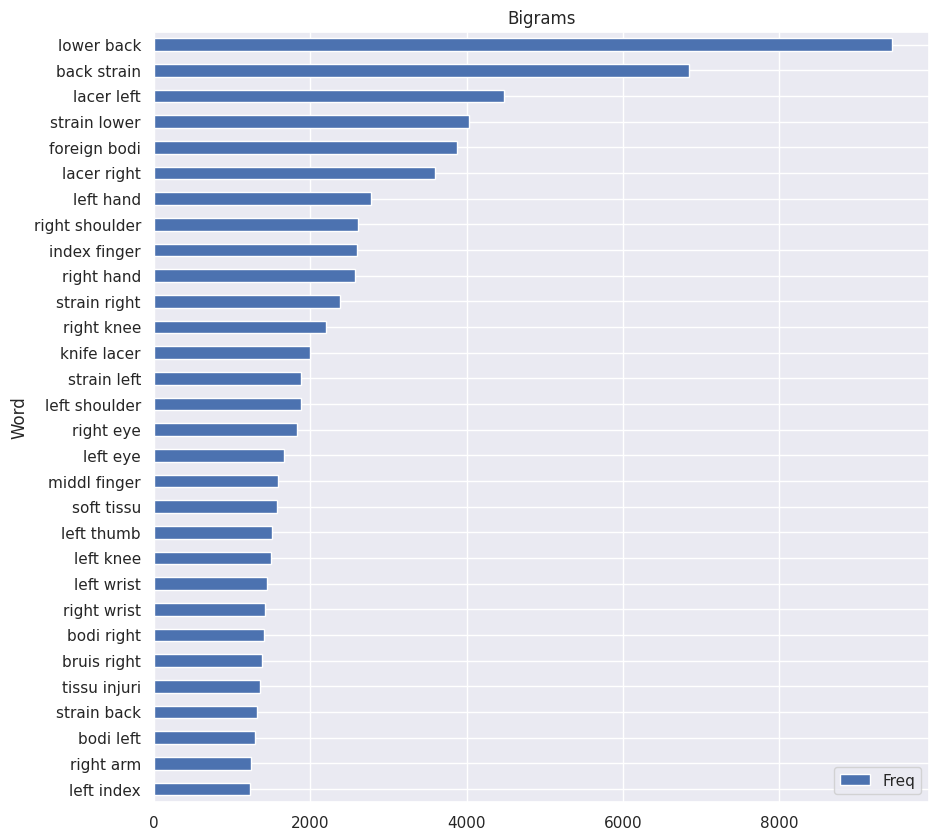

In [90]:
#Most common pairs of words that occur together in Claim Description

plt.figsize=((25,30))
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns = ["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(kind="barh",figsize=(10,10))
plt.title('Bigrams')
                  
plt.show()

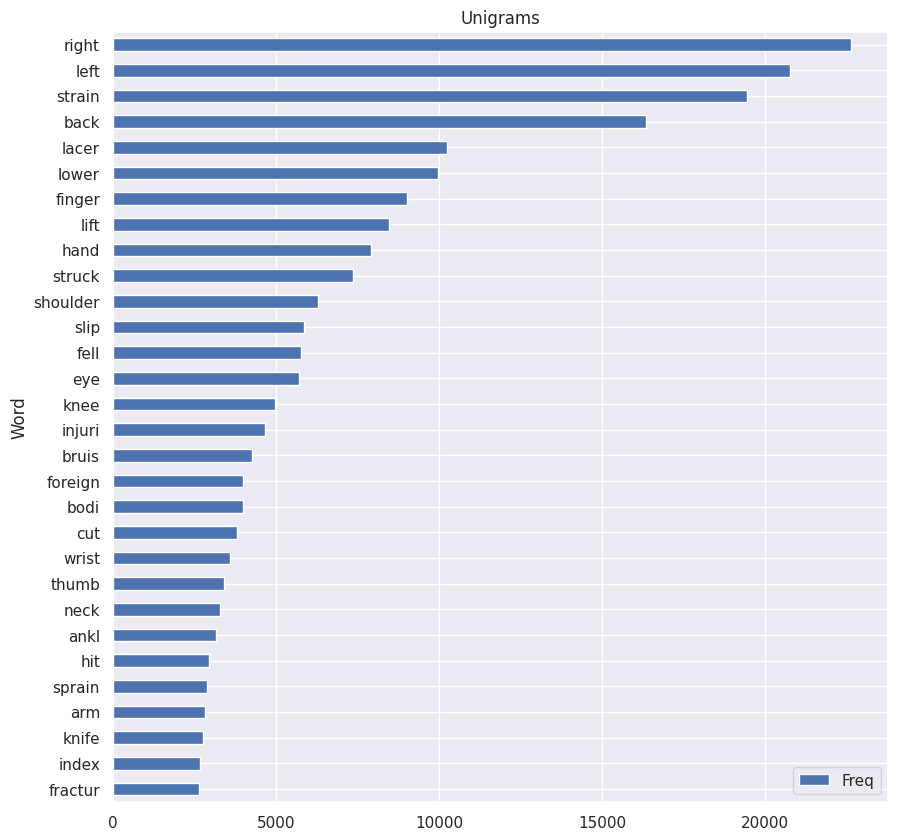

In [91]:
# single words that frequently occur in claim descr.

plt.figsize = ((25,30))
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 1))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns = ["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:30,:].sort_values(by="Freq").plot(kind="barh",figsize=(10,10))
plt.title('Unigrams')
                  
plt.show()

In [92]:
#Creating new features based on claim descr

cd_features = ['foreign bodi','lacer','tissu injuri','strain','lower back',
               'knee','wrist','eye','hand','fractur','sprain','knife','slip',
               'finger','tendon','synov','conjunct']

for feature in cd_features:
    df_all['CD_'+'_'.join(feature.split())] = df_all['ClaimDescriptionClean'].apply(lambda x:1 if feature in x else 0)
    
#Creating Features based on Claim description col.   
cd_features = ['CD_'+'_'.join(feature.split()) for feature in cd_features]


In [93]:
df_all.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,...,CD_eye,CD_hand,CD_fractur,CD_sprain,CD_knife,CD_slip,CD_finger,CD_tendon,CD_synov,CD_conjunct
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,...,0,0,0,0,0,0,0,0,0,0
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,...,0,0,1,0,0,0,0,0,0,0
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,...,0,0,0,0,0,0,0,0,0,0
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,...,0,0,0,0,0,0,0,0,0,0
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df_all[['DateTimeOfAccident', 'DateReported']].tail()

,DateTimeOfAccident,DateReported
53995,2004-08-21T18:00:00Z,2004-09-08T00:00:00Z
53996,2002-04-28T09:00:00Z,2002-09-03T00:00:00Z
53997,1992-02-28T09:00:00Z,1992-03-18T00:00:00Z
53998,1995-01-10T07:00:00Z,1995-01-31T00:00:00Z
53999,1990-10-24T14:00:00Z,1990-11-03T00:00:00Z


In [95]:
df_all['DateTimeOfAccident']=pd.to_datetime(df_all['DateTimeOfAccident'])
df_all['DateReported']=pd.to_datetime(df_all['DateReported'])

df_all['Rep_Acc_Diff']=df_all['DateReported']-df_all['DateTimeOfAccident']
df_all['Rep_Acc_Diff']=df_all['Rep_Acc_Diff'].apply(lambda x:str(x)[:2])
df_all['Rep_Acc_Diff']=df_all['Rep_Acc_Diff'].astype('int')

df_all['Accident_Month']=df_all['DateTimeOfAccident'].dt.month
df_all['Accident_Year']=df_all['DateTimeOfAccident'].dt.year
df_all['Accident_Day']=df_all['DateTimeOfAccident'].dt.day
df_all['Accident_Hour']=df_all['DateTimeOfAccident'].dt.hour
df_all['Accident_Time']=df_all['DateTimeOfAccident'].dt.time



df_all['Reported_Month']=df_all['DateReported'].dt.month
df_all['Reported_Year']=df_all['DateReported'].dt.year
df_all['Reported_Day']=df_all['DateReported'].dt.day


In [96]:
#train = df_all[df_all.role=='train']
train = df_all

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                54000 non-null  object             
 1   DateTimeOfAccident         54000 non-null  datetime64[ns, UTC]
 2   DateReported               54000 non-null  datetime64[ns, UTC]
 3   Age                        54000 non-null  int64              
 4   Gender                     54000 non-null  object             
 5   MaritalStatus              54000 non-null  object             
 6   DependentChildren          54000 non-null  int64              
 7   DependentsOther            54000 non-null  int64              
 8   WeeklyWages                54000 non-null  float64            
 9   PartTimeFullTime           54000 non-null  object             
 10  HoursWorkedPerWeek         54000 non-null  float64            
 11  Da

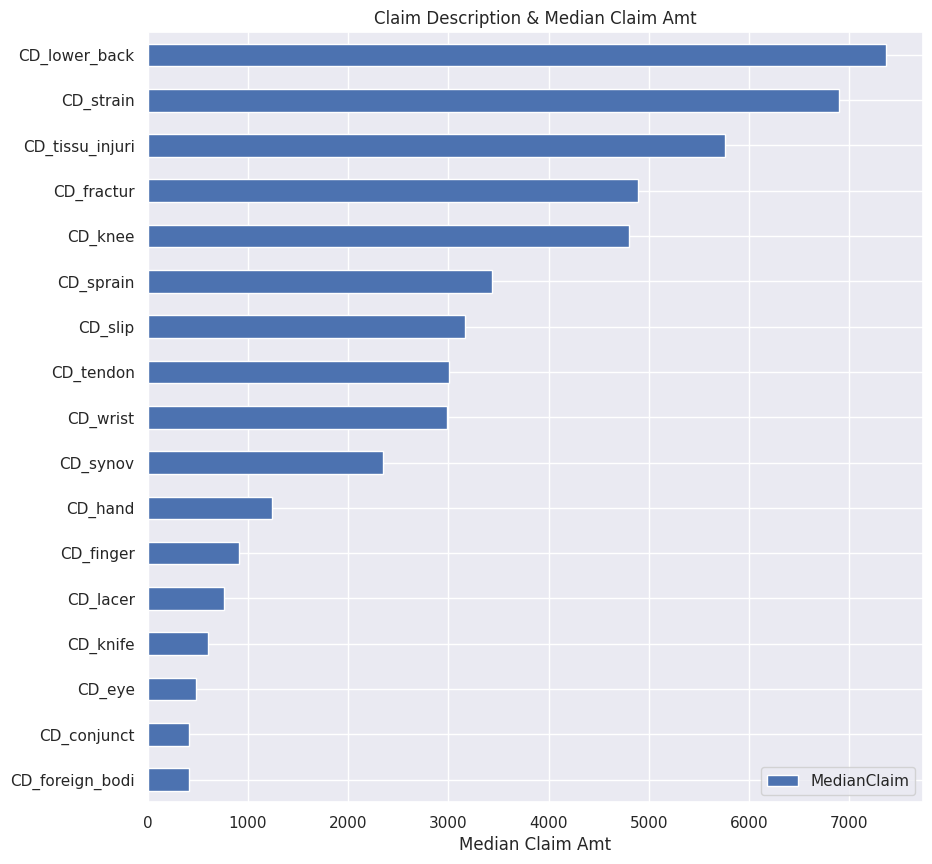

In [98]:
cd_feat_claim_median = pd.DataFrame({feature:train[train[feature] == 1]['UltimateIncurredClaimCost'].median() for feature in cd_features},index=['MedianClaim']
).T.sort_values(by = 'MedianClaim')

cd_feat_claim_median.plot(kind ='barh',figsize = (10,10))

plt.xlabel('Median Claim Amt')
plt.title('Claim Description & Median Claim Amt')
plt.show()


In [99]:
date_cols = [col for col in train.columns if col.split('_')[-1] in ['Month','Year','Day','Time']]

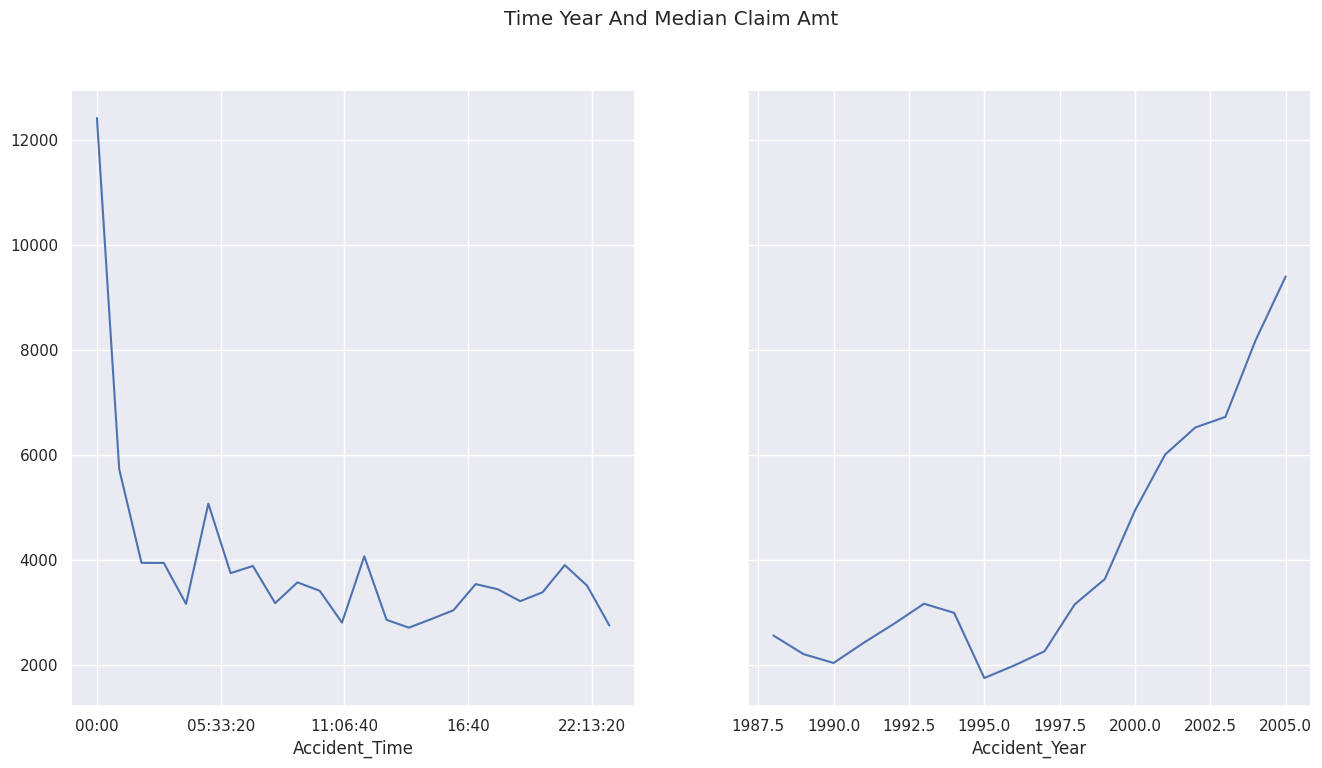

In [100]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (16,8))
fig.suptitle('Time Year And Median Claim Amt')
plt.ylabel('Median Claim Amt')

train.groupby(train['Accident_Time'])['UltimateIncurredClaimCost'].median().plot(ax = ax[0])
train.groupby(train['Accident_Year'])['UltimateIncurredClaimCost'].median().plot(ax = ax[1])

plt.show()


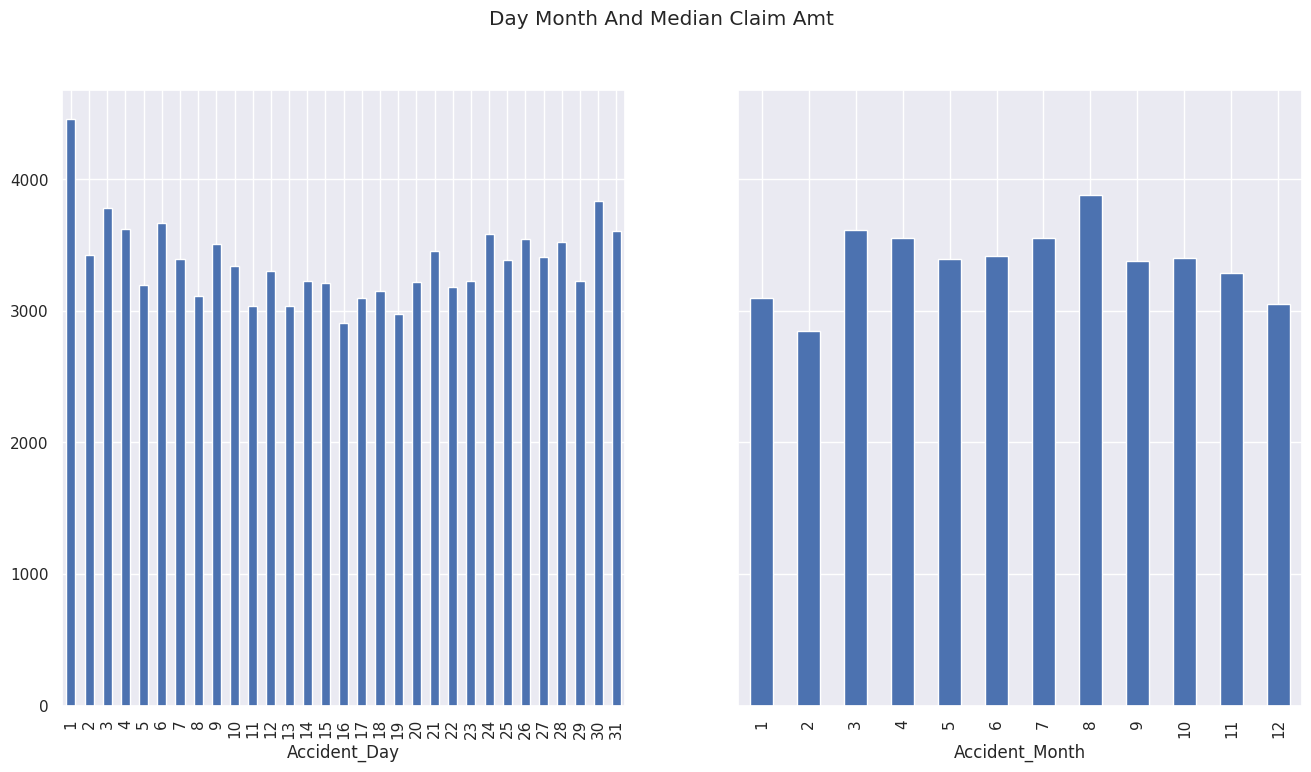

In [101]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (16,8))
fig.suptitle('Day Month And Median Claim Amt')
plt.ylabel('Median Claim Amt')

train.groupby(train['Accident_Day'])['UltimateIncurredClaimCost'].median().plot(kind='bar',ax=ax[0])
train.groupby(train['Accident_Month'])['UltimateIncurredClaimCost'].median().plot(kind='bar',ax=ax[1])

plt.show()


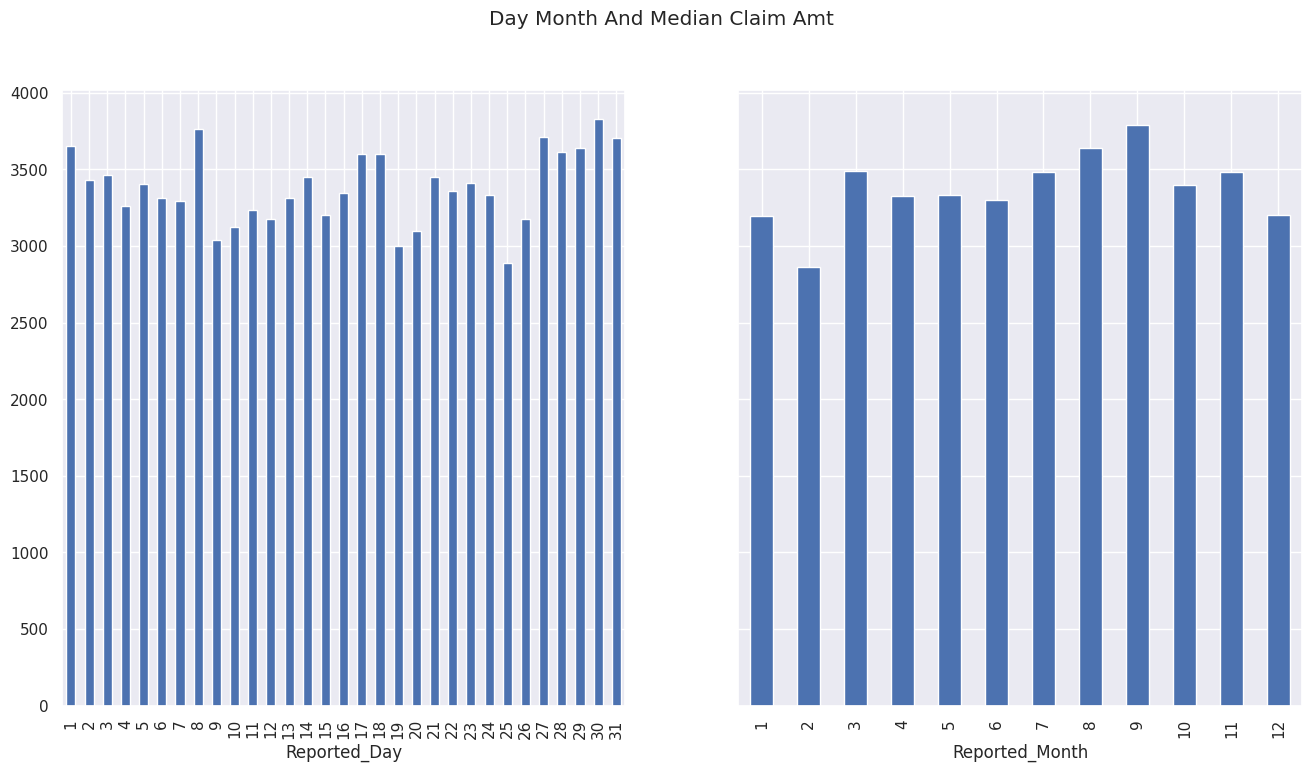

In [102]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,8))
fig.suptitle('Day Month And Median Claim Amt')
plt.ylabel('Median Claim Amt')

train.groupby(train['Reported_Day'])['UltimateIncurredClaimCost'].median().plot(kind='bar',ax=ax[0])
train.groupby(train['Reported_Month'])['UltimateIncurredClaimCost'].median().plot(kind='bar',ax=ax[1])

plt.show()



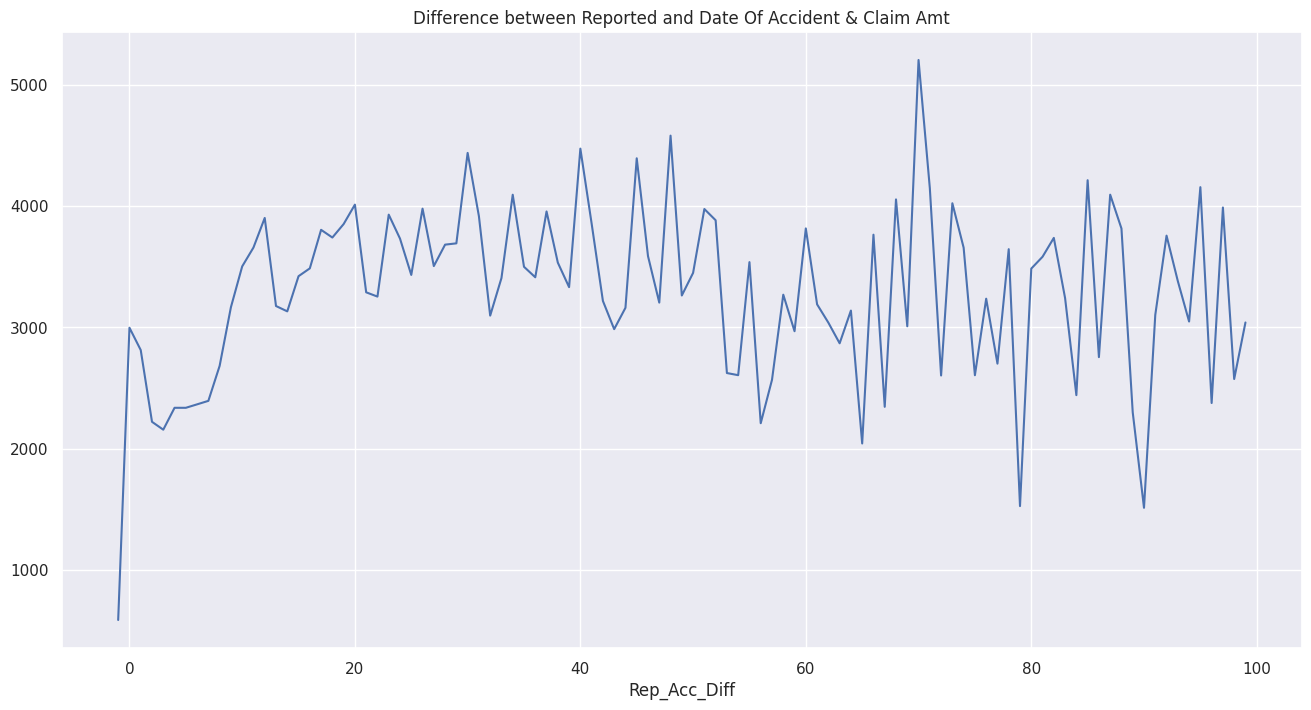

In [103]:
plt.figure(figsize=(16,8))
train.groupby(train['Rep_Acc_Diff'])['UltimateIncurredClaimCost'].median().plot()
plt.title('Difference between Reported and Date Of Accident & Claim Amt')
plt.show()

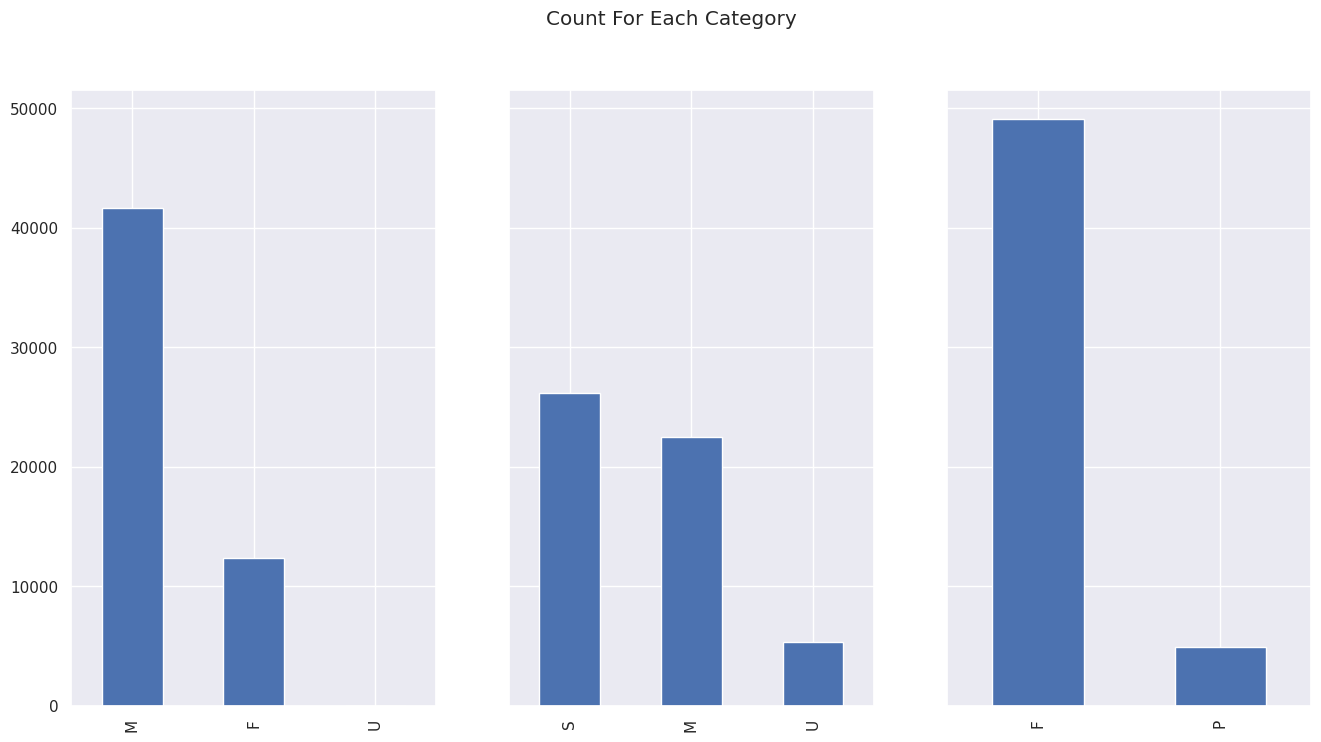

In [104]:
categoric = ['Gender','MaritalStatus','PartTimeFullTime']
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
fig.suptitle('Count For Each Category')

for i,col in enumerate(categoric):
    train[col].value_counts().plot(kind='bar',ax=ax[i])



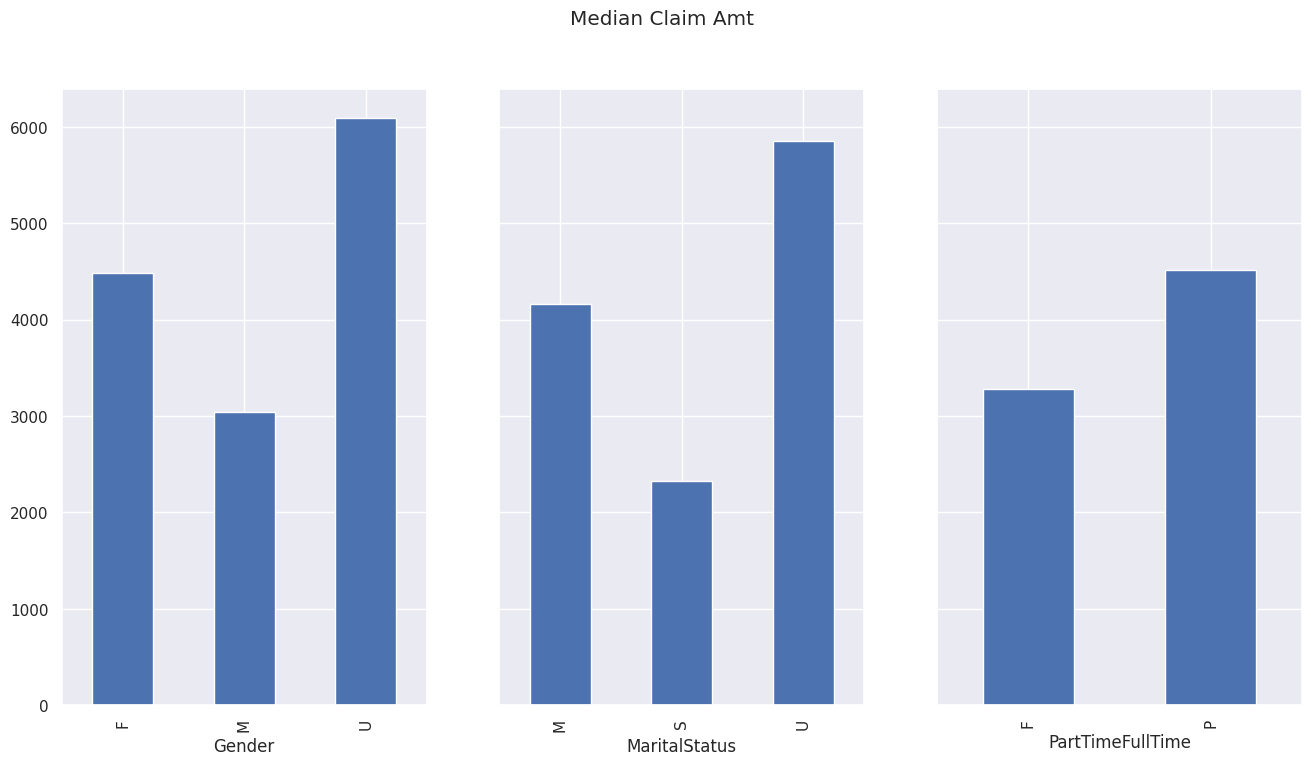

In [105]:
categoric=['Gender','MaritalStatus','PartTimeFullTime']
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(16,8))
fig.suptitle('Median Claim Amt')

for i,col in enumerate(categoric):
    train.groupby(train[col])['UltimateIncurredClaimCost'].median().plot(kind='bar',ax=ax[i])



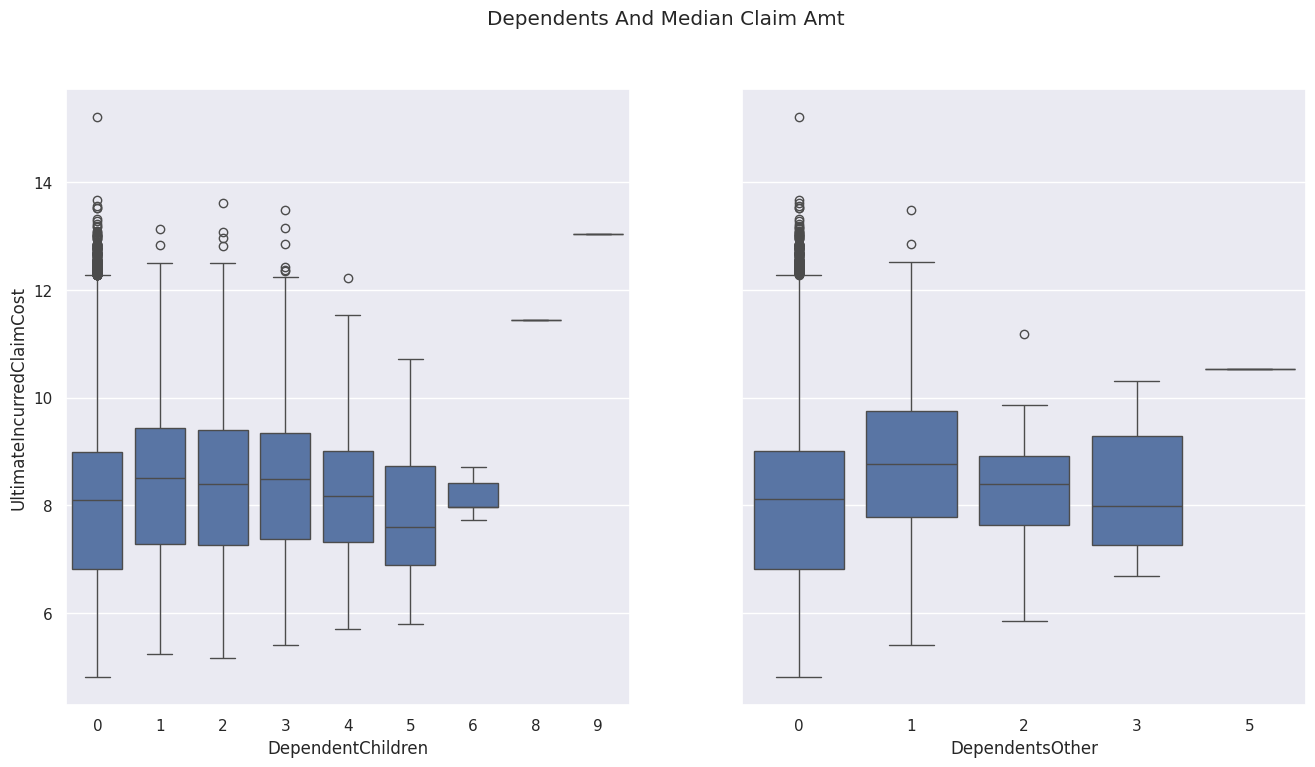

In [106]:
dep = ['DependentChildren','DependentsOther']
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,8))
fig.suptitle('Dependents And Median Claim Amt')

for i,col in enumerate(dep):
    sns.boxplot(x=train[col],y=np.log(train['UltimateIncurredClaimCost']),ax=ax[i])

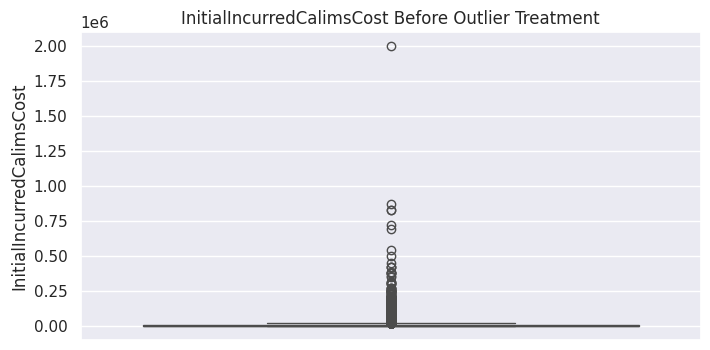

In [107]:
#Outlier Analysis of InitialIncurredCalimsCost

sns.boxplot(df_all['InitialIncurredCalimsCost'])
plt.title('InitialIncurredCalimsCost Before Outlier Treatment')
plt.show()

In [108]:
#Capping Outliers
df_all.loc[df_all['InitialIncurredCalimsCost'] >= df_all['InitialIncurredCalimsCost'].quantile(.95),
           'InitialIncurredCalimsCost'] = df_all['InitialIncurredCalimsCost'].quantile(.95)

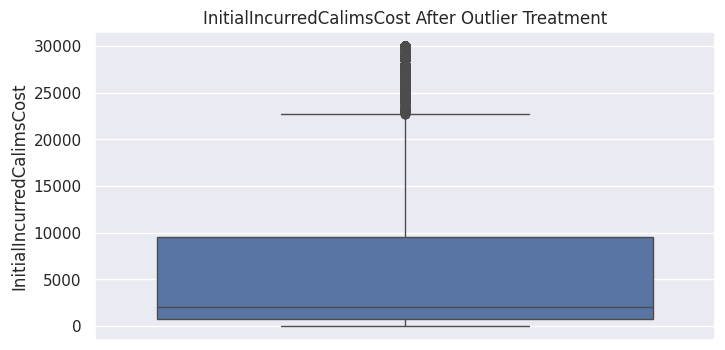

In [109]:
sns.boxplot(df_all['InitialIncurredCalimsCost'])
plt.title('InitialIncurredCalimsCost After Outlier Treatment')
plt.show()

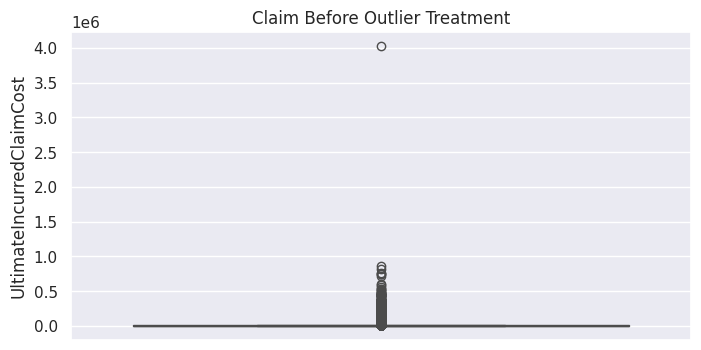

In [110]:
sns.boxplot(df_all['UltimateIncurredClaimCost'])
plt.title('Claim Before Outlier Treatment')
plt.show()

In [111]:
# Outlier Treatment
train.loc[train['UltimateIncurredClaimCost']>=train['UltimateIncurredClaimCost'].quantile(.95),
          'UltimateIncurredClaimCost']=train['UltimateIncurredClaimCost'].quantile(.95)

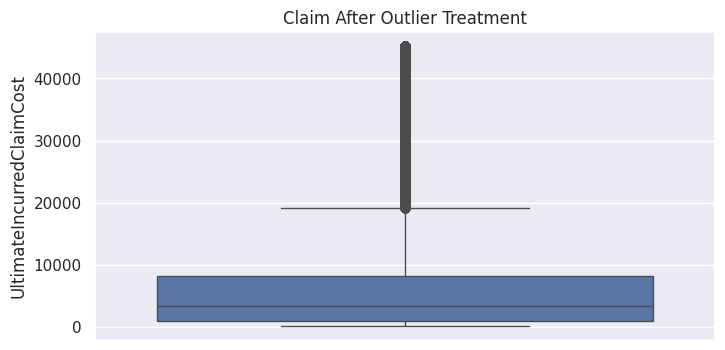

In [112]:
#After Outlier Treatment
sns.boxplot(train['UltimateIncurredClaimCost'])
plt.title('Claim After Outlier Treatment')
plt.show()

In [113]:
#train=df_all[df_all.role=='train']
#test=df_all[df_all.role=='test']
train=df_all

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   ClaimNumber                54000 non-null  object             
 1   DateTimeOfAccident         54000 non-null  datetime64[ns, UTC]
 2   DateReported               54000 non-null  datetime64[ns, UTC]
 3   Age                        54000 non-null  int64              
 4   Gender                     54000 non-null  object             
 5   MaritalStatus              54000 non-null  object             
 6   DependentChildren          54000 non-null  int64              
 7   DependentsOther            54000 non-null  int64              
 8   WeeklyWages                54000 non-null  float64            
 9   PartTimeFullTime           54000 non-null  object             
 10  HoursWorkedPerWeek         54000 non-null  float64            
 11  Da

In [117]:
train_id = train.ClaimNumber
#test_id = test.ClaimNumber

train.drop(['ClaimNumber','DateTimeOfAccident', 'DateReported','ClaimDescription', 'word_count',
       'ClaimDescriptionClean','Accident_Time'],axis=1,inplace=True)

#test.drop(['ClaimNumber','DateTimeOfAccident', 'DateReported','ClaimDescription','role', 'word_count',
 #      'ClaimDescriptionClean','Accident_Time'],axis=1,inplace=True)

In [118]:
train = pd.get_dummies(train)
#test = pd.get_dummies(test) 

In [119]:
train.drop(['Gender_U','MaritalStatus_U','PartTimeFullTime_P'],axis=1,inplace=True)
#test.drop(['MaritalStatus_U','PartTimeFullTime_P'],axis=1,inplace=True)

In [120]:
# Train test Split of train data
from sklearn.model_selection import  train_test_split

In [121]:
X = train.drop(['UltimateIncurredClaimCost'],axis=1)
Y = train['UltimateIncurredClaimCost']

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        54000 non-null  int64  
 1   DependentChildren          54000 non-null  int64  
 2   DependentsOther            54000 non-null  int64  
 3   WeeklyWages                54000 non-null  float64
 4   HoursWorkedPerWeek         54000 non-null  float64
 5   DaysWorkedPerWeek          54000 non-null  int64  
 6   InitialIncurredCalimsCost  54000 non-null  int64  
 7   CD_foreign_bodi            54000 non-null  int64  
 8   CD_lacer                   54000 non-null  int64  
 9   CD_tissu_injuri            54000 non-null  int64  
 10  CD_strain                  54000 non-null  int64  
 11  CD_lower_back              54000 non-null  int64  
 12  CD_knee                    54000 non-null  int64  
 13  CD_wrist                   54000 non-null  int

# Scale

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7)

In [124]:
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,CD_foreign_bodi,CD_lacer,CD_tissu_injuri,...,Accident_Day,Accident_Hour,Reported_Month,Reported_Year,Reported_Day,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,PartTimeFullTime_F
18606,32,0,0,200.00,38.0,5,15000,0,0,0,...,6,12,4,2002,11,0,1,0,1,1
42702,21,0,0,417.20,37.5,5,3500,0,0,1,...,5,1,5,1992,27,1,0,0,1,1
30125,44,0,0,482.61,38.0,5,3000,0,0,0,...,6,13,3,1997,16,0,1,1,0,1
36026,54,0,0,417.80,38.0,5,10000,0,0,0,...,17,12,3,1998,31,1,0,0,1,1
17583,25,0,0,300.00,38.0,5,25200,0,0,0,...,8,12,3,1994,23,0,1,0,1,1


In [125]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16200 entries, 52213 to 17117
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        16200 non-null  int64  
 1   DependentChildren          16200 non-null  int64  
 2   DependentsOther            16200 non-null  int64  
 3   WeeklyWages                16200 non-null  float64
 4   HoursWorkedPerWeek         16200 non-null  float64
 5   DaysWorkedPerWeek          16200 non-null  int64  
 6   InitialIncurredCalimsCost  16200 non-null  int64  
 7   CD_foreign_bodi            16200 non-null  int64  
 8   CD_lacer                   16200 non-null  int64  
 9   CD_tissu_injuri            16200 non-null  int64  
 10  CD_strain                  16200 non-null  int64  
 11  CD_lower_back              16200 non-null  int64  
 12  CD_knee                    16200 non-null  int64  
 13  CD_wrist                   16200 non-null 

In [143]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 37800 entries, 18606 to 36976
Series name: UltimateIncurredClaimCost
Non-Null Count  Dtype  
--------------  -----  
37800 non-null  float64
dtypes: float64(1)
memory usage: 590.6 KB


In [139]:
def scale_data(train,test):
    '''Accepts train, validate, test data frames and applies min-max scaler
    return: train, validate, test scaled pandas dataframe'''
    
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train)
    
    train_scaled = scaler.transform(train)
    #validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    #validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
    return train_scaled, test_scaled

In [140]:
X_trainS, X_testS = scale_data(X_train, X_test)

In [142]:
X_trainS.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,CD_foreign_bodi,CD_lacer,CD_tissu_injuri,...,Accident_Day,Accident_Hour,Reported_Month,Reported_Year,Reported_Day,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,PartTimeFullTime_F
0,0.279412,0.0,0.0,0.026547,0.059561,0.666667,0.499983,0.0,0.0,0.0,...,0.166667,0.521739,0.272727,0.777778,0.333333,0.0,1.0,0.0,1.0,1.0
1,0.117647,0.0,0.0,0.055523,0.058777,0.666667,0.116637,0.0,0.0,1.0,...,0.133333,0.043478,0.363636,0.222222,0.866667,1.0,0.0,0.0,1.0,1.0
2,0.455882,0.0,0.0,0.064249,0.059561,0.666667,0.099970,0.0,0.0,0.0,...,0.166667,0.565217,0.181818,0.500000,0.500000,0.0,1.0,1.0,0.0,1.0
3,0.602941,0.0,0.0,0.055603,0.059561,0.666667,0.333311,0.0,0.0,0.0,...,0.533333,0.521739,0.181818,0.555556,1.000000,1.0,0.0,0.0,1.0,1.0
4,0.176471,0.0,0.0,0.039888,0.059561,0.666667,0.839995,0.0,0.0,0.0,...,0.233333,0.521739,0.181818,0.333333,0.733333,0.0,1.0,0.0,1.0,1.0


In [144]:
y_train_base = pd.DataFrame(y_train)
y_test_base = pd.DataFrame(y_test)

# 1. Predict pred_mean
cost_pred_mean = y_train_base.UltimateIncurredClaimCost.mean()
y_train_base['cost_pred_mean'] = cost_pred_mean
y_test_base['cost_pred_mean'] = cost_pred_mean

# 2. compute pred_median
cost_pred_median = y_train_base.UltimateIncurredClaimCost.median()
y_train_base['cost_pred_median'] = cost_pred_median
y_test_base['cost_pred_median'] = cost_pred_median

In [145]:
#baseline target df
y_train_base.head()

,UltimateIncurredClaimCost,cost_pred_mean,cost_pred_median
18606,13016.391000,7928.237853,3362.029965
42702,11398.470110,7928.237853,3362.029965
30125,5471.742267,7928.237853,3362.029965
36026,7967.889268,7928.237853,3362.029965
17583,45224.184435,7928.237853,3362.029965


In [148]:
# 3. RMSE of pred_mean
rmse_train = mean_squared_error(y_train_base.UltimateIncurredClaimCost, y_train_base.cost_pred_mean) ** .5
rmse_test = mean_squared_error(y_test_base.UltimateIncurredClaimCost, y_test_base.cost_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nTest/Out-of-Sample: ", round(rmse_test, 2))
print()

# 4. RMSE of pred_median
rmse_train = mean_squared_error(y_train_base.UltimateIncurredClaimCost, y_train_base.cost_pred_median) ** .5
rmse_test = mean_squared_error(y_test_base.UltimateIncurredClaimCost, y_test_base.cost_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nTest/Out-of-Sample: ", round(rmse_test, 2))

RMSE using Mean
Train/In-Sample:  11606.55 
Test/Out-of-Sample:  11567.2

RMSE using Median
Train/In-Sample:  12472.46 
Test/Out-of-Sample:  12447.9


# OLS

In [151]:
y_train_lm = pd.DataFrame(y_train)
y_test_lm = pd.DataFrame(y_test)

lm = LinearRegression()

lm.fit(X_trainS, y_train)

y_train_lm['cost_pred_lm'] = lm.predict(X_trainS)

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_lm.cost_pred_lm) ** (1/2)

# predict test
y_test_lm['cost_pred_lm'] = lm.predict(X_testS)

# evaluate: rmse
rmse_test = mean_squared_error(y_test, y_test_lm.cost_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nTest/Out-of-Sample: ", rmse_test)



RMSE for OLS using LinearRegression
Training/In-Sample:  6955.520614437349 
Test/Out-of-Sample:  6995.9036988643165


In [152]:
# R2 for train
explained_variance_score(y_train_lm.UltimateIncurredClaimCost, y_train_lm.cost_pred_lm)

0.6408689932199425

In [153]:
# R2 for test
explained_variance_score(y_test_lm.UltimateIncurredClaimCost, y_test_lm.cost_pred_lm)

0.6342213559268877

# GLM

In [155]:
y_train_glm = pd.DataFrame(y_train)
y_test_glm = pd.DataFrame(y_test)

glm = TweedieRegressor(power=1, alpha=0)

glm.fit(X_trainS, y_train)

# predict train
y_train_glm['cost_pred_glm'] = glm.predict(X_trainS)

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_glm.cost_pred_glm) ** (1/2)

# predict test
y_test_glm['cost_pred_glm'] = lm.predict(X_testS)

# evaluate: rmse
rmse_test = mean_squared_error(y_test, y_test_glm.cost_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie\nTraining/In-Sample: ", rmse_train, 
      "\nTest/Out-of-Sample: ", rmse_test)


RMSE for OLS using LinearRegression
Training/In-Sample:  7429.9326966630915 
Test/Out-of-Sample:  6995.9036988643165


In [156]:
# R2 for train
explained_variance_score(y_train_glm.UltimateIncurredClaimCost, y_train_glm.cost_pred_glm)

0.5902094157390089

In [157]:
# R2 for test
explained_variance_score(y_test_glm.UltimateIncurredClaimCost, y_test_glm.cost_pred_glm)

0.6342213559268877

# XGB

In [158]:
import xgboost

In [191]:
y_train_xgb = pd.DataFrame(y_train)
y_test_xgb = pd.DataFrame(y_test)

#Training on default params
xgb = xgboost.XGBRegressor() 
xgb.fit(X_trainS,y_train)

#predict train
y_train_xgb['cost_pred_xgb'] = xgb.predict(X_trainS)

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_xgb.cost_pred_xgb) ** (1/2)

# predict test
y_test_xgb['cost_pred_xgb'] = xgb.predict(X_testS)

# evaluate: rmse
rmse_test = mean_squared_error(y_test, y_test_xgb.cost_pred_xgb) ** (1/2)

print("RMSE for XGB\nTraining/In-Sample: ", rmse_train, 
      "\nTest/Out-of-Sample: ", rmse_test)


RMSE for XGB
Training/In-Sample:  5339.120415940151 
Test/Out-of-Sample:  6943.778212099826


In [169]:
# R2 for train
explained_variance_score(y_train_xgb.UltimateIncurredClaimCost, y_train_xgb.cost_pred_xgb)

0.7883915531585644

In [170]:
# R2 for test
explained_variance_score(y_test_xgb.UltimateIncurredClaimCost, y_test_xgb.cost_pred_xgb)

0.6396387564664792

# Gradient Boosting

In [171]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [278]:
y_train_gbr = pd.DataFrame(y_train)
y_test_gbr = pd.DataFrame(y_test)

#Training on custom params
'''gbr = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                         learning_rate=0.05, loss='squared_error', max_depth=4, max_features=None,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=1, min_samples_split=2,
                                         min_weight_fraction_leaf=0.0, n_estimators=300,subsample=1.0, verbose=0,
                                         warm_start=False)'''

gbr = ensemble.GradientBoostingRegressor()
gbr.fit(X_trainS, y_train)

#predict train
y_train_gbr['cost_pred_gbr'] = gbr.predict(X_trainS)

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_gbr.cost_pred_gbr) ** (1/2)

# predict test
y_test_gbr['cost_pred_gbr'] = gbr.predict(X_testS)

# evaluate: rmse
rmse_test = mean_squared_error(y_test, y_test_gbr.cost_pred_gbr) ** (1/2)

print("RMSE for GBR\nTraining/In-Sample: ", rmse_train, 
      "\nTest/Out-of-Sample: ", rmse_test)


RMSE for GBR
Training/In-Sample:  6595.608024799055 
Test/Out-of-Sample:  6743.66516443253


In [206]:
# R2 for train
explained_variance_score(y_train_gbr.UltimateIncurredClaimCost, y_train_gbr.cost_pred_gbr)

0.695253329928333

In [207]:
# R2 for test
explained_variance_score(y_test_gbr.UltimateIncurredClaimCost, y_test_gbr.cost_pred_gbr)

0.6600216090773023

In [186]:
# feature ranking for gbr model
feature_labels = np.array(X_trainS.columns.tolist())
importance = gbr.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))


CD_conjunct-0.00%
CD_synov-0.00%
Gender_F-0.00%
CD_slip-0.00%
CD_tendon-0.00%
CD_sprain-0.00%
Gender_M-0.00%
MaritalStatus_M-0.01%
DependentChildren-0.01%
CD_wrist-0.01%
DaysWorkedPerWeek-0.01%
MaritalStatus_S-0.01%
CD_knife-0.01%
PartTimeFullTime_F-0.02%
Accident_Month-0.02%
Reported_Month-0.02%
CD_fractur-0.02%
Accident_Hour-0.03%
CD_knee-0.03%
DependentsOther-0.03%
HoursWorkedPerWeek-0.04%
Accident_Day-0.05%
Rep_Acc_Diff-0.05%
CD_foreign_bodi-0.06%
Reported_Day-0.08%
CD_lower_back-0.11%
CD_hand-0.19%
CD_tissu_injuri-0.25%
CD_finger-0.34%
CD_eye-0.35%
Age-0.37%
Accident_Year-0.44%
CD_strain-0.58%
CD_lacer-0.65%
Reported_Year-0.73%
WeeklyWages-1.17%
InitialIncurredCalimsCost-94.31%


In [181]:
X_train

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,CD_foreign_bodi,CD_lacer,CD_tissu_injuri,...,Accident_Day,Accident_Hour,Reported_Month,Reported_Year,Reported_Day,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,PartTimeFullTime_F
18606,32,0,0,200.00,38.0,5,15000,0,0,0,...,6,12,4,2002,11,0,1,0,1,1
42702,21,0,0,417.20,37.5,5,3500,0,0,1,...,5,1,5,1992,27,1,0,0,1,1
30125,44,0,0,482.61,38.0,5,3000,0,0,0,...,6,13,3,1997,16,0,1,1,0,1
36026,54,0,0,417.80,38.0,5,10000,0,0,0,...,17,12,3,1998,31,1,0,0,1,1
17583,25,0,0,300.00,38.0,5,25200,0,0,0,...,8,12,3,1994,23,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21962,46,0,0,411.54,38.0,5,15000,0,0,0,...,5,11,5,2001,1,0,1,0,1,1
51729,42,0,0,200.00,20.0,5,20000,0,1,0,...,17,10,1,2003,22,1,0,1,0,0
49551,29,0,0,500.00,38.0,5,7500,0,0,0,...,26,10,10,1990,11,0,1,0,1,1
31296,30,0,0,330.00,40.0,5,1575,0,0,0,...,22,9,2,1990,8,0,1,0,1,1


In [182]:
X_trainS

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,CD_foreign_bodi,CD_lacer,CD_tissu_injuri,...,Accident_Day,Accident_Hour,Reported_Month,Reported_Year,Reported_Day,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S,PartTimeFullTime_F
0,0.279412,0.0,0.0,0.026547,0.059561,0.666667,0.499983,0.0,0.0,0.0,...,0.166667,0.521739,0.272727,0.777778,0.333333,0.0,1.0,0.0,1.0,1.0
1,0.117647,0.0,0.0,0.055523,0.058777,0.666667,0.116637,0.0,0.0,1.0,...,0.133333,0.043478,0.363636,0.222222,0.866667,1.0,0.0,0.0,1.0,1.0
2,0.455882,0.0,0.0,0.064249,0.059561,0.666667,0.099970,0.0,0.0,0.0,...,0.166667,0.565217,0.181818,0.500000,0.500000,0.0,1.0,1.0,0.0,1.0
3,0.602941,0.0,0.0,0.055603,0.059561,0.666667,0.333311,0.0,0.0,0.0,...,0.533333,0.521739,0.181818,0.555556,1.000000,1.0,0.0,0.0,1.0,1.0
4,0.176471,0.0,0.0,0.039888,0.059561,0.666667,0.839995,0.0,0.0,0.0,...,0.233333,0.521739,0.181818,0.333333,0.733333,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795,0.485294,0.0,0.0,0.054768,0.059561,0.666667,0.499983,0.0,0.0,0.0,...,0.133333,0.478261,0.363636,0.722222,0.000000,0.0,1.0,0.0,1.0,1.0
37796,0.426471,0.0,0.0,0.026547,0.031348,0.666667,0.666656,0.0,1.0,0.0,...,0.533333,0.434783,0.000000,0.833333,0.700000,1.0,0.0,1.0,0.0,0.0
37797,0.235294,0.0,0.0,0.066569,0.059561,0.666667,0.249975,0.0,0.0,0.0,...,0.833333,0.434783,0.818182,0.111111,0.333333,0.0,1.0,0.0,1.0,1.0
37798,0.250000,0.0,0.0,0.043890,0.062696,0.666667,0.052468,0.0,0.0,0.0,...,0.700000,0.391304,0.090909,0.111111,0.233333,0.0,1.0,0.0,1.0,1.0


In [188]:
lm.n_features_in_

37

# ADA Boost

In [189]:
from sklearn.ensemble import AdaBoostRegressor

In [212]:
y_train_ada = pd.DataFrame(y_train)
y_test_ada = pd.DataFrame(y_test)

#Training on default params
ada = ensemble.AdaBoostRegressor()

ada.fit(X_trainS, y_train)

#predict train
y_train_ada['cost_pred_ada'] = ada.predict(X_trainS)

# evaluate: rmse
rmse_train = mean_squared_error(y_train, y_train_ada.cost_pred_ada) ** (1/2)

# predict test
y_test_ada['cost_pred_ada'] = ada.predict(X_testS)

# evaluate: rmse
rmse_test = mean_squared_error(y_test, y_test_ada.cost_pred_ada) ** (1/2)

print("RMSE for ADA\nTraining/In-Sample: ", rmse_train, 
      "\nTest/Out-of-Sample: ", rmse_test)


RMSE for ADA
Training/In-Sample:  8160.797995265051 
Test/Out-of-Sample:  8233.259409958273


In [213]:
# R2 for train
explained_variance_score(y_train_gbr.UltimateIncurredClaimCost, y_train_gbr.cost_pred_gbr)

0.695253329928333

In [214]:
# R2 for test
explained_variance_score(y_test_gbr.UltimateIncurredClaimCost, y_test_gbr.cost_pred_gbr)

0.6600216090773023

In [215]:
# feature ranking for ada model
feature_labels = np.array(X_trainS.columns.tolist())
importance = ada.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))


CD_knife-0.00%
Reported_Month-0.00%
Accident_Month-0.00%
Rep_Acc_Diff-0.00%
CD_conjunct-0.00%
CD_synov-0.00%
CD_tendon-0.00%
CD_finger-0.00%
CD_slip-0.00%
MaritalStatus_S-0.00%
CD_sprain-0.00%
CD_fractur-0.00%
CD_hand-0.00%
Accident_Day-0.00%
Accident_Hour-0.00%
CD_knee-0.00%
CD_lower_back-0.00%
Reported_Day-0.00%
CD_tissu_injuri-0.00%
Gender_F-0.00%
CD_foreign_bodi-0.00%
Gender_M-0.00%
DaysWorkedPerWeek-0.00%
HoursWorkedPerWeek-0.00%
MaritalStatus_M-0.00%
DependentsOther-0.00%
DependentChildren-0.00%
CD_wrist-0.00%
Reported_Year-0.14%
PartTimeFullTime_F-0.15%
Age-0.33%
Accident_Year-0.66%
CD_strain-1.79%
CD_eye-2.57%
WeeklyWages-2.68%
CD_lacer-2.70%
InitialIncurredCalimsCost-88.97%


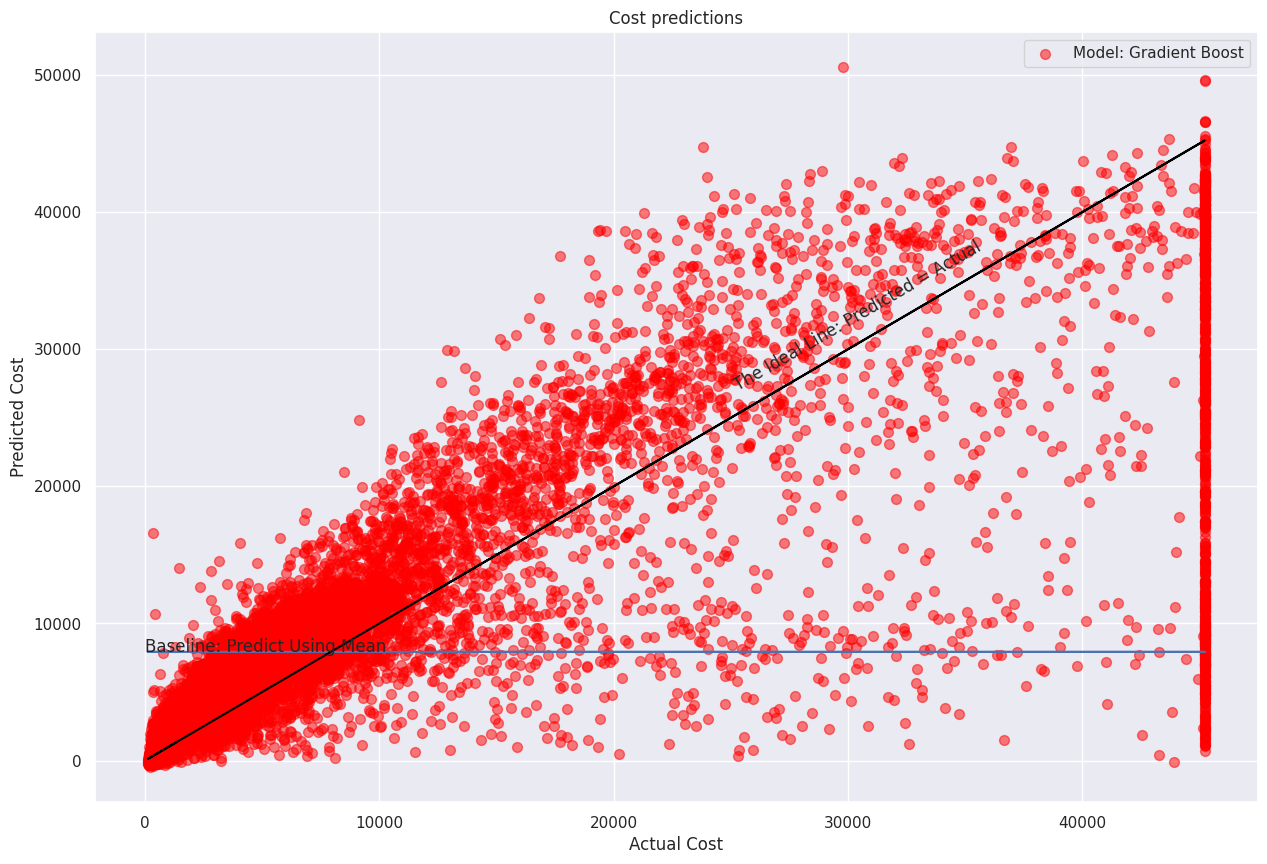

In [246]:
plt.figure(figsize=(15,10))
plt.plot(y_test_base.UltimateIncurredClaimCost, y_test_base.cost_pred_mean, label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (0.5, 7928))
plt.plot(y_test_base.UltimateIncurredClaimCost, y_test_base.UltimateIncurredClaimCost,color ='black', label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (25000, 27000), rotation=30)

plt.scatter(y_test_gbr.UltimateIncurredClaimCost, y_test_gbr.cost_pred_gbr, 
            alpha=.5, color="red", s=50, label="Model: Gradient Boost")

plt.legend()
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Cost predictions")

plt.show()


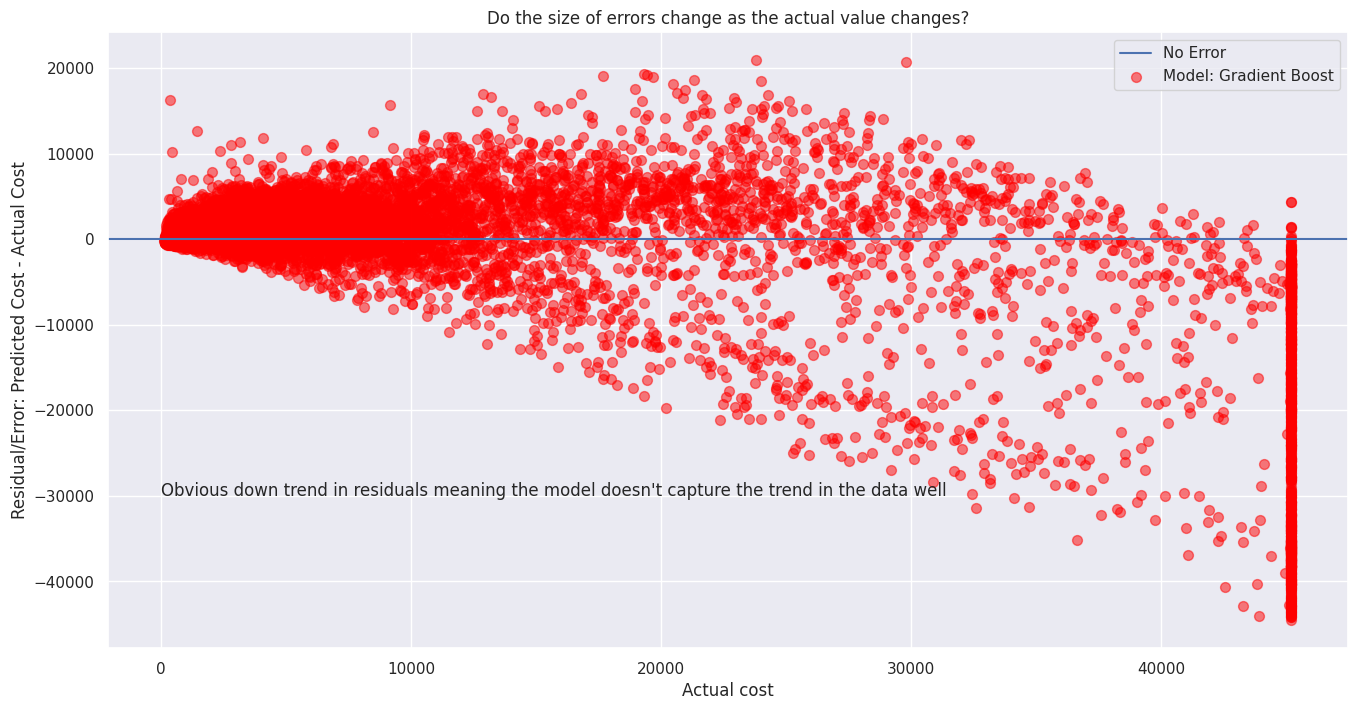

In [256]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_test_gbr.UltimateIncurredClaimCost, y_test_gbr.cost_pred_gbr-y_test_gbr.UltimateIncurredClaimCost, 
            alpha=.5, color="red", s=50, label="Model: Gradient Boost")

plt.legend()
plt.xlabel("Actual cost")
plt.ylabel("Residual/Error: Predicted Cost - Actual Cost")
plt.title("Do the size of errors change as the actual value changes?")
plt.annotate("Obvious down trend in residuals meaning the model doesn't capture the trend in the data well",(2.0, -30000))

plt.show()

In [257]:
y_test_gbr.describe()

,UltimateIncurredClaimCost,cost_pred_gbr
count,16200.000000,16200.000000
mean,7961.075371,7914.570595
std,11567.512891,9432.323180
min,121.886805,-485.675208
25%,932.292063,1480.932884
50%,3401.660445,4774.740558
75%,8175.339614,9656.400960
max,45224.184435,50568.272460


In [224]:
y_test_base

,UltimateIncurredClaimCost,cost_pred_mean,cost_pred_median
52213,1376.020751,7928.237853,3362.029965
3172,589.846045,7928.237853,3362.029965
1560,294.209929,7928.237853,3362.029965
37740,1123.247631,7928.237853,3362.029965
47231,1990.417462,7928.237853,3362.029965
...,...,...,...
33417,670.505481,7928.237853,3362.029965
28396,34164.731440,7928.237853,3362.029965
25286,246.668140,7928.237853,3362.029965
6972,45170.533330,7928.237853,3362.029965


In [228]:
y_test

52213     1376.020751
3172       589.846045
1560       294.209929
37740     1123.247631
47231     1990.417462
             ...     
33417      670.505481
28396    34164.731440
25286      246.668140
6972     45170.533330
17117    12068.731440
Name: UltimateIncurredClaimCost, Length: 16200, dtype: float64

In [230]:
y_test_gbr

,UltimateIncurredClaimCost,cost_pred_gbr
52213,1376.020751,1636.687463
3172,589.846045,1278.848433
1560,294.209929,365.675277
37740,1123.247631,1038.087714
47231,1990.417462,2085.174202
...,...,...
33417,670.505481,690.206309
28396,34164.731440,37304.740700
25286,246.668140,-66.497616
6972,45170.533330,9121.046104


In [258]:
from sklearn.feature_selection import RFECV

In [279]:
# Recursive feature engineering with cross validation
gbrcv = ensemble.GradientBoostingRegressor()
gbrcv.fit(X_trainS, y_train)

GradientBoostingRegressor()

In [292]:
rfecv = RFECV(estimator=gbrcv, step=1, 
              min_features_to_select=3, 
              scoring='neg_mean_squared_error',
              verbose = 1,
              n_jobs = 1
             )
rfecv.fit(X_trainS, y_train)

Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 fe

RFECV(estimator=GradientBoostingRegressor(), min_features_to_select=3, n_jobs=1,
      scoring='neg_mean_squared_error', verbose=1)

In [293]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 21


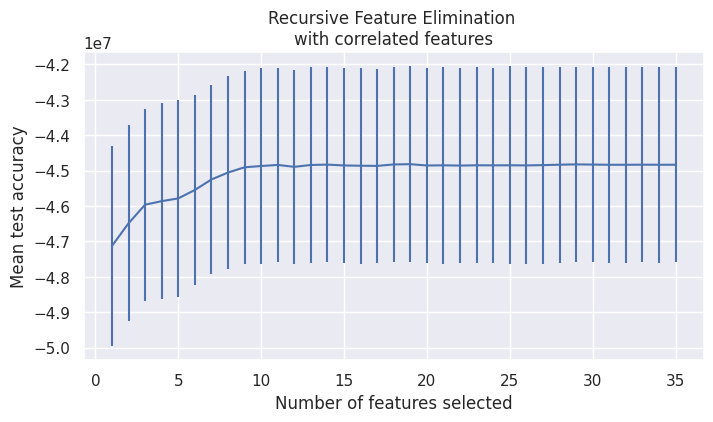

In [294]:
min_features_to_select = 1 
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


In [295]:
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression

def select_kbest(X, y, k):
    f_selector = SelectKBest(f_regression, k)
    f_selector.fit(X, y)
    feature_mask = f_selector.get_support()

    f_feature = X.iloc[:,feature_mask].columns.tolist()
    return f_feature

def rfe(X,y,k):
    lm = LinearRegression()
    rfe = RFE(lm,k)
    rfe.fit(X, y)
    feature_mask_rfe = rfe.support_
    rfe_feature = X.iloc[:,feature_mask_rfe].columns.tolist()
    return rfe_feature

In [345]:
import tensorflow as tf
from keras.layers import Activation, Dense 
print(tf.__version__) # check the version (should be 2.x+)

2.15.0


In [427]:
# Set random seed
#tf.random.set_seed(42)

'''#creating 3 layer neural network
model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(1,181)),
    keras.layers.Dense(37, activation=tf.nn.relu),
    keras.layers.Dense(25, activation=tf.nn.relu), 
    keras.layers.Dense(1, activation=tf.nn.sigmoid),'''

# Create a model (same as above)
'''model = tf.keras.Sequential([
    tf.keras.layers.Dense(37),
])'''

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(37,)),# ,input_shape=(37,),activation='relu'),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss='mse',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), #tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.R2Score()
])

In [428]:
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 500)               19000     
                                                                 
 dense_91 (Dense)            (None, 1)                 501       
                                                                 
Total params: 19501 (76.18 KB)
Trainable params: 19501 (76.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [429]:
# Fit model (this time we'll train for longer)
model.fit(X_trainS, y_train, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1182/1182 [==============================] - 2s 1ms/step - loss: 99975872.0000 - root_mean_squared_error: 9998.7939 - r2_score: 0.2579
Epoch 2/100
1182/1182 [==============================] - 1s 1ms/step - loss: 53476324.0000 - root_mean_squared_error: 7312.7510 - r2_score: 0.6030
Epoch 3/100
1182/1182 [==============================] - 1s 962us/step - loss: 47647580.0000 - root_mean_squared_error: 6902.7227 - r2_score: 0.6463
Epoch 4/100
1182/1182 [==============================] - 1s 975us/step - loss: 47265904.0000 - root_mean_squared_error: 6875.0205 - r2_score: 0.6491
Epoch 5/100
1182/1182 [==============================] - 1s 1ms/step - loss: 47045948.0000 - root_mean_squared_error: 6859.0049 - r2_score: 0.6508
Epoch 6/100
1182/1182 [==============================] - 1s 1ms/step - loss: 46984872.0000 - root_mean_squared_error: 6854.5513 - r2_score: 0.6512
Epoch 7/100
1182/1182 [==============================] - 1s 1ms/step - loss: 46823528.0000 - root_mean_squared_err

1182/1182 [==============================] - 1s 1ms/step - loss: 45737544.0000 - root_mean_squared_error: 6762.9536 - r2_score: 0.6605
Epoch 57/100
1182/1182 [==============================] - 1s 1ms/step - loss: 45747744.0000 - root_mean_squared_error: 6763.7080 - r2_score: 0.6604
Epoch 58/100
1182/1182 [==============================] - 1s 1ms/step - loss: 45748480.0000 - root_mean_squared_error: 6763.7622 - r2_score: 0.6604
Epoch 59/100
1182/1182 [==============================] - 1s 1ms/step - loss: 45739468.0000 - root_mean_squared_error: 6763.0962 - r2_score: 0.6605
Epoch 60/100
1182/1182 [==============================] - 1s 1ms/step - loss: 45689496.0000 - root_mean_squared_error: 6759.4004 - r2_score: 0.6608
Epoch 61/100
1182/1182 [==============================] - 1s 1ms/step - loss: 45678176.0000 - root_mean_squared_error: 6758.5630 - r2_score: 0.6609
Epoch 62/100
1182/1182 [==============================] - 1s 1ms/step - loss: 45697148.0000 - root_mean_squared_error: 6759.9

In [430]:
model.metrics_names

['loss', 'root_mean_squared_error', 'r2_score']

In [431]:
#train metrics
loss, rmse, r2 = model.evaluate(X_trainS, y_train, verbose=0)
print('\nTrain RMSE:', round(rmse, 2))
print('Train R2:', round(r2,2))


Train RMSE: 6755.45
Train R2: 0.66


In [432]:
#test metrics
loss, rmse, r2 = model.evaluate(X_testS, y_test, verbose=0)
print('\nTest RMSE:', round(rmse, 2))
print('Test R2:', round(r2,2))


Test RMSE: 6887.03
Test R2: 0.65
